In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# wfpt

def wfpt(t,v, t0,a,z,err=1e-29):

    tt = (t - t0) / (a**2)
    if t< 0:
        v=-v
        t=-t
        tt = (t -t0) / (a**2)
#         print('sign flipped')
    w = z/a

    ks = 2 + np.sqrt(-2*tt * np.log(2*np.sqrt(2*np.pi*tt)*err))
    ks = np.max((ks, np.sqrt(tt)+1))

    K=10
    k = np.arange(-4,6)
    p = np.cumsum((w+2*k)*np.exp(-((w+2*k)**2)/2/tt))
    p = p[-1]/np.sqrt(2*np.pi*tt**3)

    pp = p * np.exp(-v*a*w - (v**2)*t/2)/(a**2)

    return (pp)

In [3]:
def wfpt_2(t,v, t0,a,z,err=1e-29):

    tt = (t - t0) / (a**2)
    if t< 0:
        v=-v
        t=-t
        tt = (-t -t0) / (a**2)
#         print('sign flipped')
    w = z/a

    ks = 2 + np.sqrt(-2*tt * np.log(2*np.sqrt(2*np.pi*tt)*err))
    ks = np.max((ks, np.sqrt(tt)+1))

    K=10
    k = np.arange(-4,6)
    p = np.cumsum((w+2*k)*np.exp(-((w+2*k)**2)/2/tt))
    p = p[-1]/np.sqrt(2*np.pi*tt**3)

    pp = p * np.exp(-v*a*w - (v**2)*t/2)/(a**2)

    return (pp)

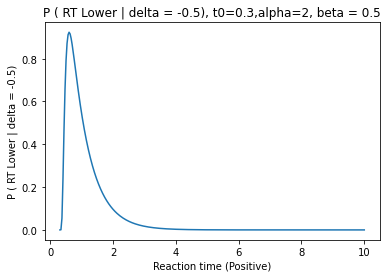

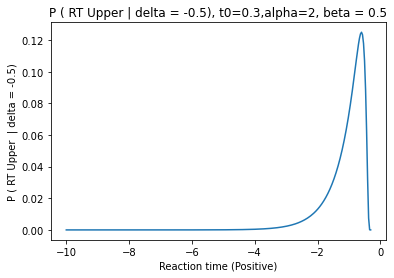

In [10]:
pdf1 = []
for i in np.linspace(0.31,10,300):
    prob = wfpt(i,-1, 0.3, 2, 2/2, err=1e-29)
    pdf1.append(prob)
plt.plot(np.linspace(0.31,10,300), pdf1)
plt.xlabel('Reaction time (Positive)')
plt.ylabel('P ( RT Lower | delta = -0.5)')
plt.title('P ( RT Lower | delta = -0.5), t0=0.3,alpha=2, beta = 0.5')
plt.show()

pdf2 = []
for i in np.linspace(-0.31,-10,300):
    prob = wfpt(i,-1, 0.3, 2, 2/2, err=1e-29)
    pdf2.append(prob)
plt.plot(np.linspace(-0.31,-10,300), pdf2)
plt.xlabel('Reaction time (Positive)')
plt.ylabel('P ( RT Upper  | delta = -0.5)')
plt.title('P ( RT Upper | delta = -0.5), t0=0.3,alpha=2, beta = 0.5')
plt.show()



# pdf2 = []
# for i in np.linspace(-0.31,-10,300):
#     prob = wfpt(i,0.5,0.3, 2, 2/2, err=1e-29)
#     pdf2.append(prob)

# plt.plot(np.linspace(-0.31,-10,300), pdf2)
# plt.xlabel('Reaction time (Negative')
# plt.ylabel('P ( RT incorrect | delta = -0.5)')
# plt.title('P ( RT incorrect | delta = -0.5), t0=0.3,alpha=2, beta = 0.5')
# plt.show()

In [5]:
np.sum(pdf1)*0.0324 +np.sum(pdf2)*0.0324

0.8604985906373168

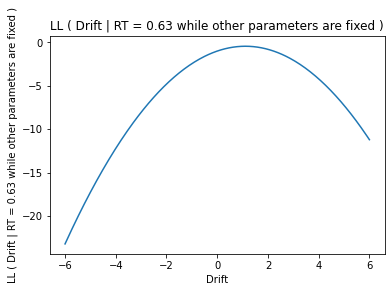

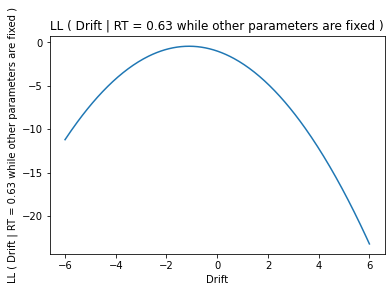

In [14]:

#############################
#likelihood of RT given drift
##############################

pdf = []
for i in np.linspace(-6,6,300):
    prob = np.log(wfpt(-0.9,i,0.3, 2, 2/2, err=1e-29))
    pdf.append(prob)

plt.plot(np.linspace(-6,6,300), pdf)
plt.xlabel('Drift')
plt.ylabel('LL ( Drift | RT = 0.63 while other parameters are fixed )')
plt.title('LL ( Drift | RT = 0.63 while other parameters are fixed )')
plt.show()

pdf = []
for i in np.linspace(-6,6,300):
    prob = np.log(wfpt(0.9,i,0.3, 2, 2/2, err=1e-29))
    pdf.append(prob)

plt.plot(np.linspace(-6,6,300), pdf)
plt.xlabel('Drift')
plt.ylabel('LL ( Drift | RT = 0.63 while other parameters are fixed )')
plt.title('LL ( Drift | RT = 0.63 while other parameters are fixed )')
plt.show()



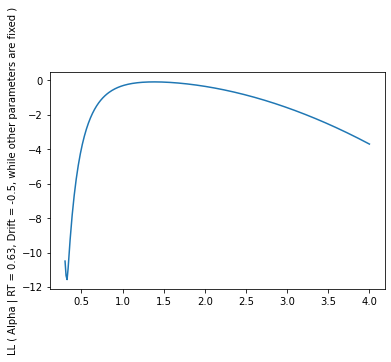

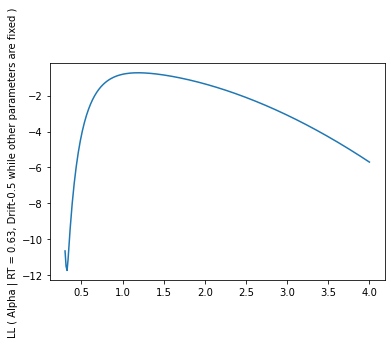

In [7]:
pdf = []
for i in np.linspace(0.3,4,300):
    prob_small= np.log(wfpt(0.63,-0.5,0.3,i,i/2,err=1e-29))
    pdf.append(prob_small)
plt.plot(np.linspace(0.3,4,300), pdf)
plt.ylabel('LL ( Alpha | RT = 0.63, Drift = -0.5, while other parameters are fixed )')

plt.show()


pdf = []
for i in np.linspace(0.3,4,300):
    prob_small= np.log(wfpt(-0.63,-0.5,0.3,i,i/2,err=1e-29))
    pdf.append(prob_small)
plt.plot(np.linspace(0.3,4,300), pdf)
plt.ylabel('LL ( Alpha | RT = 0.63, Drift-0.5 while other parameters are fixed )')

plt.show()